# Short Time Fourier Transform

In [1]:
import numpy as np
import scipy.io as sio
from scipy import signal
from scipy.fft import fft
import matplotlib.pyplot as plt

In [2]:
mat = sio.loadmat('data/sampleEEGdata.mat')

In [3]:
EEG = mat['EEG']

In [4]:
srate = EEG['srate'][0][0][0][0]
srate

256

In [5]:
times = EEG['times'][0][0]
times.shape

(1, 640)

In [6]:
data = EEG['data'][0][0]
data.shape

(64, 640, 99)

In [7]:
pnts = EEG['pnts'][0][0][0][0]
pnts

640

Text(0, 0.5, 'Amplitude')

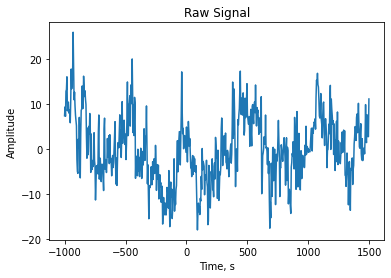

In [8]:
timewin = 500 # in ms

# convert ms to idx
timewinidx = np.round(timewin/(1000/srate)).astype(int)

# create Hann taper function
hann_win = 0.5 * (1 - np.cos(2 * np.pi * np.arange(0, timewinidx) / timewinidx))

# detrend data to attenuate super-low frequency artifacts in FFT 
# from sampled data
d = signal.detrend(data[20,:,16])

# plot raw signal
fig, ax = plt.subplots()
ax.plot(times.reshape(-1,1), d)
ax.set_title('Raw Signal')
ax.set_xlabel('Time, s')
ax.set_ylabel('Amplitude')

# Window Function

We apply the Hann Window, defined as:

\begin{equation}
w(n)=0.5-0.5 \cos \left(\frac{2 \pi n}{M-1}\right) \quad 0 \leq n \leq M-1
\end{equation}

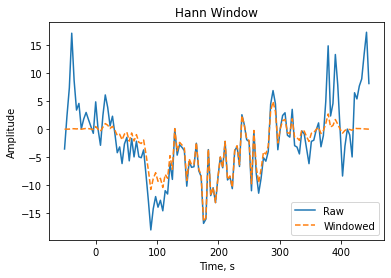

In [9]:
# compute index at time -50ms
stime = np.argmin(np.abs(times - -50))

# plot window with raw signal and STFT of it
fig, ax = plt.subplots()

ax.plot(times.reshape(-1, 1)[stime:stime+timewinidx], d[stime:stime+timewinidx], '-', label='Raw')
ax.plot(times.reshape(-1, 1)[stime:stime+timewinidx], d[stime:stime+timewinidx]*hann_win, '--', label='Windowed')
ax.set_title('Hann Window')
ax.set_xlabel('Time, s')
ax.set_ylabel('Amplitude')
ax.legend(loc=4)

# Power Spectrum

Text(0, 0.5, 'Power')

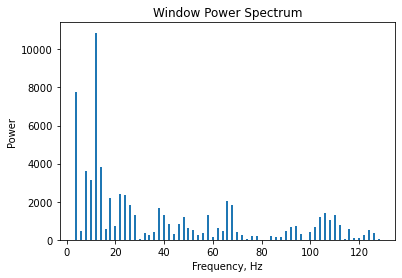

In [10]:
dfft = fft(d[stime:stime+timewinidx]*hann_win)

# frequencies of FFT
f = np.linspace(0, srate/2, (np.floor(hann_win.shape[0]/2) + 1).astype(int))

fig, ax = plt.subplots()
ax.bar(f[2:], np.abs(dfft[2:((np.floor(hann_win.shape[0]/2)+1).astype(int))])**2)
ax.set_title('Window Power Spectrum')
ax.set_xlabel('Frequency, Hz')
ax.set_ylabel('Power')

Text(0, 0.5, 'Frequency, Hz')

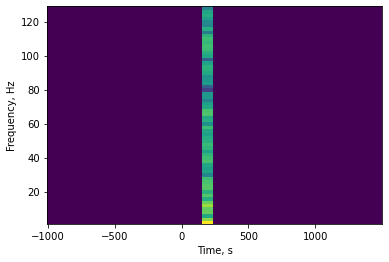

In [12]:
tf = np.zeros((np.floor(len(hann_win)/2).astype(int), pnts))
tf[:,stime+(timewinidx/2).astype(int)-10:stime+(timewinidx/2).astype(int)+10] = \
    np.tile(np.abs(dfft[1:np.floor(len(hann_win)/2).astype(int)+1])*2, (20,1)).conj().T

fig, ax = plt.subplots()
ax.pcolormesh(times, f[1:], np.log10(tf + 1), shading='auto')
ax.set_xlabel('Time, s')
ax.set_ylabel('Frequency, Hz')